In [1]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shp_file_name = "AUS_adm1.shp"


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(zip_file_name):
        print "unzipping"
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print "done"

loading from file
done


In [5]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [6]:
a = world.iloc[8]

continent                                               Oceania
gdp_md_est                                               800200
geometry      (POLYGON ((145.3979781434948 -40.7925485166058...
iso_a3                                                      AUS
name                                                  Australia
pop_est                                             2.12626e+07
Name: 8, dtype: object


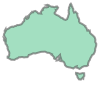

In [7]:
print a
a.geometry

continent                                               Oceania
gdp_md_est                                               800200
geometry      (POLYGON ((145.3979781434948 -40.7925485166058...
iso_a3                                                      AUS
name                                                  Australia
pop_est                                             2.12626e+07
Name: 8, dtype: object


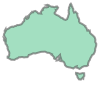

In [8]:
aus = world.iloc[8]
print aus
aus.geometry

In [9]:
# aus.plot()

In [10]:
# aus.plot()

In [11]:
# ausmap.plot()

In [12]:
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt
# from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# def brazil_states(projection=ccrs.PlateCarree()):
#     fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projection))
#     ax.set_extent([-82, -32, -45, 10])
#     ax.stock_img()
#     ax.add_feature(LAND)
#     ax.add_feature(COASTLINE)
#     gl = ax.gridlines(draw_labels=True)
#     gl.xlabels_top = False
#     gl.ylabels_right = False
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     return fig, ax

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


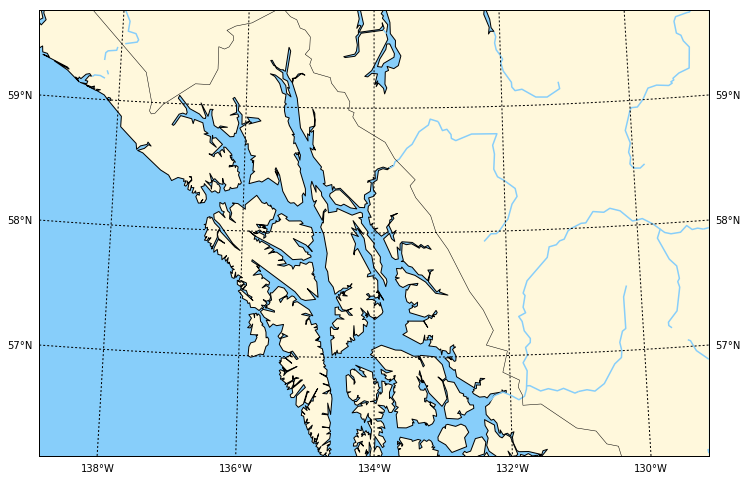

In [13]:
from mpl_toolkits.basemap import Basemap
import numpy as np
water = 'lightskyblue'
earth = 'cornsilk'
juneau_lon, juneau_lat = -134.4167, 58.3
 
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000,
    resolution='i',
    projection='aea',
    ellps='WGS84',
    lat_1=55., lat_2=65.,
    lat_0=58., lon_0=-134)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, 80), 
    labels=[True, True, False, False])
x, y = mm(juneau_lon, juneau_lat)


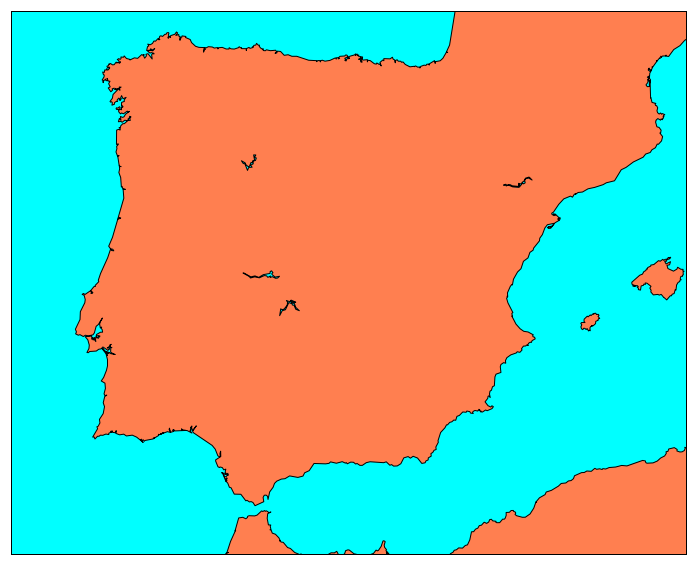

In [14]:
map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

In [15]:
# map = Basemap(llcrnrlon=90,llcrnrlat=-45.,urcrnrlon=160,urcrnrlat=-10,
#              resolution='c', projection='tmerc', area_thresh = 1000.0, lat_0 = -27.5, lon_0 = -125)

# map.drawmapboundary(fill_color='aqua')
# map.fillcontinents(color='coral',lake_color='aqua')
# map.drawcoastlines()

# plt.show()

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


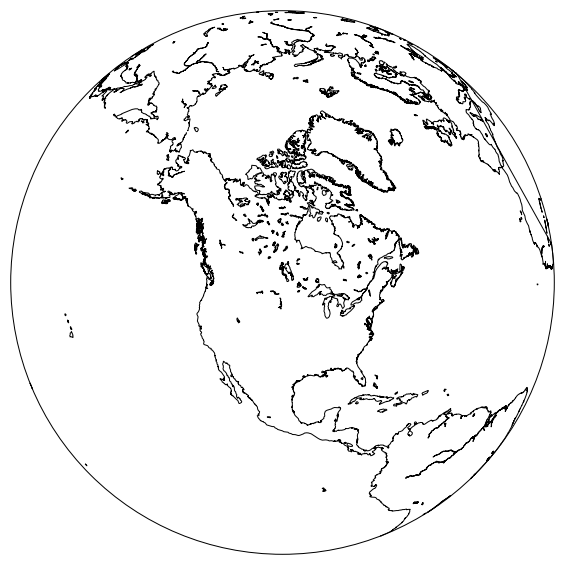

In [16]:
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)

map.drawcoastlines()

plt.show()

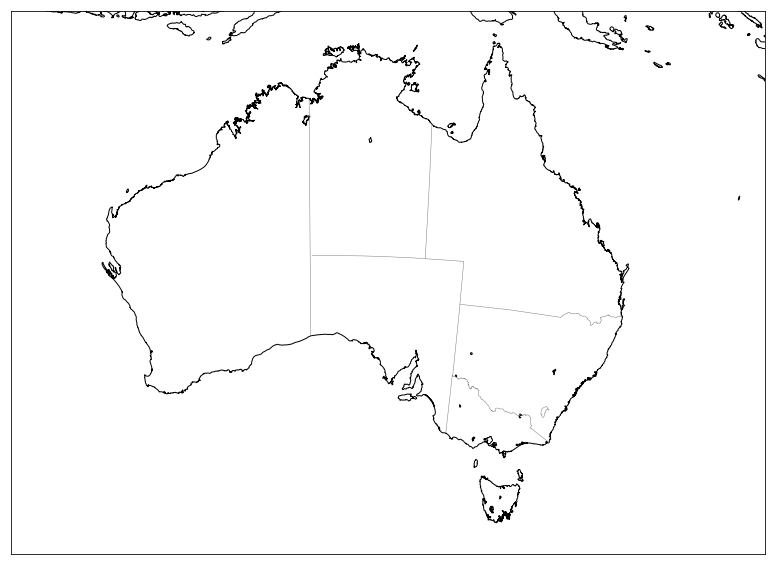

In [24]:
OZMINLAT = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
OZMAXLAT = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
OZMINLON = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
OZMAXLON = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
OZMIDLAT = -25.6
OZMIDLON = 130

m = Basemap(llcrnrlon=OZMINLON, llcrnrlat=OZMINLAT, 
    urcrnrlon=OZMAXLON, urcrnrlat=OZMAXLAT, resolution='i',
    lat_0=OZMIDLAT, lon_0=OZMIDLON, 
    area_thresh=100.,projection='tmerc')
coast = m.drawcoastlines()
m.drawstates(color='0.5')